In [38]:
import pandas as pd
import numpy as np

## 데이터셋 불러오기

*df 의 row 수 267777 개 맞는지 확인 해 주세요


In [39]:
# 코랩 mount
from google.colab import drive
drive.mount('/content/drive')

# root_path = "C:/Users/user/Desktop/기계학습이해/"
root_path = "/content/drive/MyDrive/기계학습이해/"

# 데이터 읽어오기
df1 = pd.read_csv(root_path+"Dataset/(자동차보험) 고객별 사고 발생률 예측 모델링_1.csv", encoding = "cp949", engine='python')
df2 = pd.read_csv(root_path+"Dataset/(자동차보험) 고객별 사고 발생률 예측 모델링_2.csv", encoding = "cp949", engine='python')
df3 = pd.read_csv(root_path+"Dataset/(자동차보험) 고객별 사고 발생률 예측 모델링_3.csv", encoding = "cp949", engine='python')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
predicted = pd.read_csv(root_path + "Dataset/predicted_result.csv", encoding = 'UTF8', engine='python')
predicted2 = pd.read_csv(root_path + "Dataset/accident_rate.csv", encoding = 'UTF8', engine='python')

In [41]:
# 데이터 이상 없는 df의 column 확인
col = df2.columns

# 오류로 생성된 column 삭제
df1 = df1[col]

# df1의 파일상 null 행 삭제
null_idx = df1[df1["차종"].isnull()].index.tolist()
df1 = df1.drop(index = null_idx)

df1

,ZCPRLCLCD,ZINSRDAVL,ZIOSEXCD,ZDPRODSCD,NCR,ZCARPSGVL,차종,ZDRVLISCD,ZDRVLISCD___T,ZENTCARCD,ZCARISDAM,ZIMAGERVL,마일리지약정거리,YUHO,SAGO
0,A10,0.0,1.0,NaN,B,신차,기타,5.0,가족및형제자매한정,8.0,5천만원이하,가입,15000K,1,0.0
1,A10,0.0,1.0,NaN,N,신차,기타,4.0,기명피보험자1인한정,8.0,미가입,미가입,15000K,1,0.0
2,A10,0.0,1.0,NaN,N,신차,기타,2.0,가족한정(형제자매제외),5.0,5천만원이하,가입,미가입,1,3.0
3,A10,0.0,1.0,1.0,N,10년이상,중형,2.0,가족한정(형제자매제외),2.0,5천만원이하,미가입,15000K,0,0.0
4,A10,0.0,1.0,1.0,Z,5년이하,다목적2종,2.0,가족한정(형제자매제외),1.0,미가입,미가입,미가입,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105812,A10,40.0,1.0,1.0,D,5년이하,중형,4.0,기명피보험자1인한정,6.0,5천만원이하,미가입,미가입,1,0.0
105813,A10,40.0,1.0,1.0,D,10년이상,소형A,3.0,부부한정,2.0,5천만원이하,미가입,15000K,2,0.0
105814,A10,40.0,1.0,1.0,D,10년이하,대형,3.0,부부한정,2.0,5천만원이하,가입,15000K,2,0.0
105815,A10,40.0,1.0,1.0,D,10년이상,중형,3.0,부부한정,7.0,5천만원이하,미가입,15000K,18,3.0


In [42]:
# 데이터 프레임 합치기
df = pd.concat([df1, df2, df3], ignore_index = True)
df

,ZCPRLCLCD,ZINSRDAVL,ZIOSEXCD,ZDPRODSCD,NCR,ZCARPSGVL,차종,ZDRVLISCD,ZDRVLISCD___T,ZENTCARCD,ZCARISDAM,ZIMAGERVL,마일리지약정거리,YUHO,SAGO
0,A10,0.0,1.0,NaN,B,신차,기타,5.0,가족및형제자매한정,8.0,5천만원이하,가입,15000K,1,0.0
1,A10,0.0,1.0,NaN,N,신차,기타,4.0,기명피보험자1인한정,8.0,미가입,미가입,15000K,1,0.0
2,A10,0.0,1.0,NaN,N,신차,기타,2.0,가족한정(형제자매제외),5.0,5천만원이하,가입,미가입,1,3.0
3,A10,0.0,1.0,1.0,N,10년이상,중형,2.0,가족한정(형제자매제외),2.0,5천만원이하,미가입,15000K,0,0.0
4,A10,0.0,1.0,1.0,Z,5년이하,다목적2종,2.0,가족한정(형제자매제외),1.0,미가입,미가입,미가입,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267772,A10,40.0,2.0,1.0,C,10년이상,중형,1.0,누구나(기본),8.0,미가입,미가입,7000K,0,0
267773,A10,40.0,2.0,1.0,C,5년이하,소형A,12.0,부부 및 자녀한정,8.0,5천만원이하,가입,15000K,2,0
267774,A10,40.0,2.0,1.0,C,10년이하,소형A,4.0,기명피보험자1인한정,8.0,미가입,미가입,미가입,6,1
267775,A10,40.0,2.0,1.0,C,5년이하,소형B,1.0,누구나(기본),7.0,5천만원이하,가입,미가입,0,0


In [43]:
# 수치형인데 object인 column 형변환
df['YUHO'] = df['YUHO'].str.replace(',', '').astype(int)
df['SAGO'] = df['SAGO'].apply(lambda x: int(float(str(x).replace(',', '').split('.')[0])))
df['SAGO'] = df['SAGO'].replace(',', '').astype(int)

# column명 한글로 변환
df = df.rename(columns = {"ZINSRDAVL": "연령대", "ZIOSEXCD": "성별",
                        "ZDPRODSCD": "국산차량여부", "NCR": "직전3년간사고건수",
                        "ZCARPSGVL": "차량경과년수", "ZDRVLISCD___T": "운전자한정특별약관",
                        "ZENTCARCD": "가입경력코드", "ZCARISDAM": "차량가입금액",
                        "ZIMAGERVL": "영상기록장치특약가입", "YUHO": "유효대수",
                        "SAGO" : "사고건수"})

# 사용하지 않는 column drop
df = df.drop(columns = ['ZCPRLCLCD', 'ZDRVLISCD'])
df

,연령대,성별,국산차량여부,직전3년간사고건수,차량경과년수,차종,운전자한정특별약관,가입경력코드,차량가입금액,영상기록장치특약가입,마일리지약정거리,유효대수,사고건수
0,0.0,1.0,NaN,B,신차,기타,가족및형제자매한정,8.0,5천만원이하,가입,15000K,1,0
1,0.0,1.0,NaN,N,신차,기타,기명피보험자1인한정,8.0,미가입,미가입,15000K,1,0
2,0.0,1.0,NaN,N,신차,기타,가족한정(형제자매제외),5.0,5천만원이하,가입,미가입,1,3
3,0.0,1.0,1.0,N,10년이상,중형,가족한정(형제자매제외),2.0,5천만원이하,미가입,15000K,0,0
4,0.0,1.0,1.0,Z,5년이하,다목적2종,가족한정(형제자매제외),1.0,미가입,미가입,미가입,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267772,40.0,2.0,1.0,C,10년이상,중형,누구나(기본),8.0,미가입,미가입,7000K,0,0
267773,40.0,2.0,1.0,C,5년이하,소형A,부부 및 자녀한정,8.0,5천만원이하,가입,15000K,2,0
267774,40.0,2.0,1.0,C,10년이하,소형A,기명피보험자1인한정,8.0,미가입,미가입,미가입,6,1
267775,40.0,2.0,1.0,C,5년이하,소형B,누구나(기본),7.0,5천만원이하,가입,미가입,0,0


## 파생변수 불러오기

- 파생변수 따로 할거면 이 부분 실행 안시켜도 돼요

In [44]:
# 연령대별 사고율
df['연령대사고율'] = np.where(df['연령대'] == 30, predicted['30대'],
                          np.where(df['연령대'] == 40, predicted['40대'],
                          np.where(df['연령대'] == 50, predicted['50대'],
                          np.where(df['연령대'] == 60, predicted['~64'],
                          np.where(df['연령대'] <= 20, predicted['20대'],
                          np.where(df['연령대'] >= 70, predicted['65~'], np.nan))))))

# 성별별 사고율
df['성별사고율'] = np.where(df['성별'] == 1, predicted['남성'], predicted['여성'])
df['성별TAAS'] = np.where(df['성별'] == 1, predicted['남성 TAAS'], predicted['여성 TAAS'])
# 특약별 사고율
df['특약사고율'] = np.where((df['운전자한정특별약관'] == '기명피보험자1인한정') | (df['운전자한정특별약관'] == '1인 및 지정1인'), predicted['특약 기명피보험자1인'],
                        np.where((df['운전자한정특별약관'] == '부부한정') | (df['운전자한정특별약관'] == '부부 및 지정1인'), predicted['특약부부'],
                        np.where((df['운전자한정특별약관'] == '가족한정(형제자매제외)') | (df['운전자한정특별약관'] == '가족및형제자매한정') | (df['운전자한정특별약관'] == '가족 및 지정1인'), predicted['특약 가족'],
                        np.where(df['운전자한정특별약관'] == '누구나(기본)', predicted['특약 미가입'],
                        np.where(df['운전자한정특별약관'] == '임직원한정', predicted['특약 기타'],
                                 predicted['특약부부']))))) # 부부및자녀한정이지워짐
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267777 entries, 0 to 267776
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   연령대         267777 non-null  float64
 1   성별          267777 non-null  float64
 2   국산차량여부      267584 non-null  float64
 3   직전3년간사고건수   267777 non-null  object 
 4   차량경과년수      267777 non-null  object 
 5   차종          267777 non-null  object 
 6   운전자한정특별약관   267777 non-null  object 
 7   가입경력코드      267777 non-null  float64
 8   차량가입금액      267777 non-null  object 
 9   영상기록장치특약가입  267777 non-null  object 
 10  마일리지약정거리    267777 non-null  object 
 11  유효대수        267777 non-null  int64  
 12  사고건수        267777 non-null  int64  
 13  연령대사고율      267777 non-null  float64
 14  성별사고율       267777 non-null  float64
 15  성별TAAS      267777 non-null  float64
 16  특약사고율       267777 non-null  float64
dtypes: float64(8), int64(2), object(7)
memory usage: 34.7+ MB


In [45]:
# 연령대별 사고율
df['연령대사고율2'] = np.where(df['연령대'] == 20, predicted2['20대'],
                          np.where(df['연령대'] == 30, predicted2['30대'],
                          np.where(df['연령대'] == 40, predicted2['40대'],
                          np.where(df['연령대'] == 50, predicted2['50대'],
                          np.where(df['연령대'] == 60, predicted2['60대'],
                          np.where(df['연령대'] == 70, predicted2['70대'],
                          np.where(df['연령대'] == 80, predicted2['80대'],
                          np.where(df['연령대'] >= 90, predicted2['90대'],
                          np.where(df['연령대'] <= 10, predicted2['10대'],np.nan)))))))))

df['차종전년도사고율2'] = np.where(df['차종'] == '중형', predicted2['중형'],
                            np.where(df['차종'] == '대형', predicted2['대형'],
                            np.where(df['차종'] == '소형B', predicted2['소형'],
                            np.where(df['차종'] == '다목적2종', predicted2['대형'],
                            np.where(df['차종'] == '소형A', predicted2['소형'],
                            np.where(df['차종'] == '대형', predicted2['대형'],
                            np.where(df['차종'] == '다목적1종', predicted2['대형'],np.nan)))))))

# 성별별 사고율
df['성별사고율2'] = np.where(df['성별'] == 1, predicted['남성'], predicted['여성'])

# 특약별 사고율
df['특약사고율2'] = np.where((df['운전자한정특별약관'] == '기명피보험자1인한정') | (df['운전자한정특별약관'] == '1인 및 지정1인'), predicted2['기명피보험자1인'],
                        np.where((df['운전자한정특별약관'] == '부부한정') | (df['운전자한정특별약관'] == '부부 및 지정1인'), predicted2['부부'],
                        np.where((df['운전자한정특별약관'] == '가족한정(형제자매제외)') | (df['운전자한정특별약관'] == '가족및형제자매한정') | (df['운전자한정특별약관'] == '가족 및 지정1인'), predicted2['가족'],
                        np.where(df['운전자한정특별약관'] == '누구나(기본)', predicted2['미가입'],
                        np.where(df['운전자한정특별약관'] == '임직원한정', predicted2['기타'],
                                 predicted2['부부']))))) # 부부및자녀한정이지워짐
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267777 entries, 0 to 267776
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   연령대         267777 non-null  float64
 1   성별          267777 non-null  float64
 2   국산차량여부      267584 non-null  float64
 3   직전3년간사고건수   267777 non-null  object 
 4   차량경과년수      267777 non-null  object 
 5   차종          267777 non-null  object 
 6   운전자한정특별약관   267777 non-null  object 
 7   가입경력코드      267777 non-null  float64
 8   차량가입금액      267777 non-null  object 
 9   영상기록장치특약가입  267777 non-null  object 
 10  마일리지약정거리    267777 non-null  object 
 11  유효대수        267777 non-null  int64  
 12  사고건수        267777 non-null  int64  
 13  연령대사고율      267777 non-null  float64
 14  성별사고율       267777 non-null  float64
 15  성별TAAS      267777 non-null  float64
 16  특약사고율       267777 non-null  float64
 17  연령대사고율2     267777 non-null  float64
 18  차종전년도사고율2   267769 non-null  float64
 19  성별

## 전처리

* df의 row 수 187983 개 인 것 확인 필요
* 이 부분은 뭔가 꼬이면 맨처음 데이터 불러오는것부터 다시 실행시켜야합니다

In [46]:
df['사고유무'] = df.apply(lambda row: 0 if row['사고건수'] == 0 else 1, axis = 1)

# 0과 100을 제거하는 방법
df = df[(df['연령대'] != 0) & (df['연령대'] != 100)].reset_index(drop=True)
df['연령대'].unique()

array([10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [47]:
df = df[df['유효대수'] <= 1].reset_index(drop=True)
df['유효대수'].unique()

array([0, 1])

In [48]:
# df = df[df['직전3년간사고건수'] <= 1]
df['직전3년간사고건수'].unique()

array(['C', 'D', 'N', 'Z', '0', 'B'], dtype=object)

In [49]:
# 결측치 제거
df.isnull().sum()

연령대             0
성별              0
국산차량여부        185
직전3년간사고건수       0
차량경과년수          0
차종              0
운전자한정특별약관       0
가입경력코드          0
차량가입금액          0
영상기록장치특약가입      0
마일리지약정거리        0
유효대수            0
사고건수            0
연령대사고율          0
성별사고율           0
성별TAAS          0
특약사고율           0
연령대사고율2         0
차종전년도사고율2       0
성별사고율2          0
특약사고율2          0
사고유무            0
dtype: int64

In [ ]:
# 국산차량 여부 지우기
df = df.dropna().reset_index(drop=True)
df.isnull().sum()

연령대           0
성별            0
국산차량여부        0
직전3년간사고건수     0
차량경과년수        0
차종            0
운전자한정특별약관     0
가입경력코드        0
차량가입금액        0
영상기록장치특약가입    0
마일리지약정거리      0
유효대수          0
사고건수          0
연령대사고율        0
성별사고율         0
성별TAAS        0
특약사고율         0
연령대사고율2       0
차종전년도사고율2     0
성별사고율2        0
특약사고율2        0
사고유무          0
dtype: int64

In [ ]:
df

,연령대,성별,국산차량여부,직전3년간사고건수,차량경과년수,차종,운전자한정특별약관,가입경력코드,차량가입금액,영상기록장치특약가입,...,사고건수,연령대사고율,성별사고율,성별TAAS,특약사고율,연령대사고율2,차종전년도사고율2,성별사고율2,특약사고율2,사고유무
0,10.0,1.0,1.0,C,10년이하,중형,가족한정(형제자매제외),8.0,5천만원이하,미가입,...,1,0.005510,0.040210,0.008801,0.087615,1.21,1.35,0.040210,0.16,1
1,10.0,1.0,1.0,D,5년이하,다목적2종,누구나(기본),8.0,5천만원이하,가입,...,1,0.005510,0.040210,0.008801,0.055043,1.21,1.50,0.040210,0.12,1
2,10.0,1.0,1.0,D,10년이상,중형,가족한정(형제자매제외),8.0,미가입,미가입,...,0,0.005510,0.040210,0.008801,0.087615,1.21,1.35,0.040210,0.16,0
3,10.0,1.0,1.0,N,5년이하,소형B,가족한정(형제자매제외),2.0,5천만원이하,가입,...,0,0.005510,0.040210,0.008801,0.087615,1.21,1.09,0.040210,0.16,0
4,10.0,1.0,1.0,N,5년이하,소형B,가족한정(형제자매제외),3.0,5천만원이하,가입,...,0,0.005510,0.040210,0.008801,0.087615,1.21,1.09,0.040210,0.16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187978,40.0,2.0,1.0,C,5년이하,소형B,부부한정,7.0,미가입,가입,...,0,0.033873,0.025433,0.003425,0.043751,0.48,1.09,0.025433,0.11,0
187979,40.0,2.0,1.0,C,10년이상,다목적2종,누구나(기본),5.0,5천만원이하,미가입,...,0,0.033873,0.025433,0.003425,0.055043,0.48,1.50,0.025433,0.12,0
187980,40.0,2.0,1.0,C,5년이하,대형,가족한정(형제자매제외),7.0,5천만원이하,가입,...,1,0.033873,0.025433,0.003425,0.087615,0.48,1.50,0.025433,0.16,1
187981,40.0,2.0,1.0,C,10년이상,중형,누구나(기본),8.0,미가입,미가입,...,0,0.033873,0.025433,0.003425,0.055043,0.48,1.35,0.025433,0.12,0


## One-hot, 은아님, 민호님 라벨링 컬럼 만들기


In [51]:
def make_df(df):
  # 연령대


  # 연령대 컬럼을 one-hot 인코딩으로 변환
  one_hot_age = pd.get_dummies(df['연령대'], prefix='연령대').reset_index(drop=True)

  # 은아님
  labeled_age = df['연령대'].apply(lambda x: int(str(x).replace(',', '').split('.')[0])).reset_index(drop=True)

  # 민호님
  column_age = df['연령대']
  numeric_age = column_age.replace({10: 19, 20: 25, 30: 35, 40: 44, 50: 54, 60: 64, 70: 73, 80: 83, 90: 93}).to_frame().reset_index(drop=True)

  # one-hot + 은아님
  one_hot_numeric_age = pd.concat([one_hot_age, numeric_age], axis = 1).reset_index(drop=True)

  # one_hot + 민호님
  labeled_numeric_age = pd.concat([labeled_age, numeric_age], axis = 1).reset_index(drop=True)

  ages = [one_hot_age, labeled_age, numeric_age,one_hot_numeric_age,labeled_numeric_age]


  # 직전 3년간 사고 건수

  one_hot_NCR = pd.get_dummies(df['직전3년간사고건수'], prefix='NCR').reset_index(drop=True)

  # 은아님
  # 신규 0, 무사고 1, 1회 2, 2회 3, 3회 4, 결측치 0 은 무사고로 편입
  labeled_NCR_1 = df['직전3년간사고건수'].apply(lambda x: str(x).replace('0', 'N'))
  labeled_NCR = labeled_NCR_1.apply(lambda x: int(str(x).replace('Z', '0').replace('N', '1').replace('D', '2').replace('C', '3').replace('B', '4'))).reset_index(drop=True)


  # 민호님
  column_NCR = df['직전3년간사고건수']
  numeric_NCR = column_NCR.replace({'N': 0, 'D': 1, 'C': 2, 'B': 3, 'Z': 0.15}).to_frame().reset_index(drop=True)

  # one-hot + 은아님
  one_hot_numeric_NCR = pd.concat([one_hot_NCR, numeric_NCR], axis = 1).reset_index(drop=True)

  # one_hot + 민호님
  labeled_numeric_NCR = pd.concat([labeled_NCR, numeric_NCR], axis = 1).reset_index(drop=True)

  NCRs = [one_hot_NCR, labeled_NCR, numeric_NCR, one_hot_numeric_NCR, labeled_numeric_NCR]


  ## 차량 경과년수

  one_hot_carAge = pd.get_dummies(df['차량경과년수'], prefix='차량경과년수').reset_index(drop=True)

  # 은아님
  labeled_carAge = df['차량경과년수'].apply(lambda x: int(str(x).replace('신차', '0').replace('5년이하', '1').replace('10년이하', '2').replace('10년이상', '3'))).reset_index(drop=True)


  # 민호님
  column_carAge = df['차량경과년수']
  numeric_carAge = column_carAge.replace({'신차': 0, '5년이하': 3.16, '10년이하': 7.8, '10년이상': 12.86}).to_frame().reset_index(drop=True)

  # one-hot + 은아님
  one_hot_numeric_carAge = pd.concat([one_hot_carAge, numeric_carAge], axis = 1).reset_index(drop=True)


  # one_hot + 민호님
  labeled_numeric_carAge = pd.concat([labeled_carAge, numeric_carAge], axis = 1).reset_index(drop=True)

  carAges = [one_hot_carAge, labeled_carAge, numeric_carAge, one_hot_numeric_carAge, labeled_numeric_carAge]


  # 차종
  one_hot_carType = pd.get_dummies(df['차종'], prefix='차종').reset_index(drop=True)

  # 은아님
  labeled_carType = df['차종'].apply(lambda x: int(str(x).replace('소형A', '0').replace('소형B', '1').replace('중형', '2').replace('대형', '3').replace('다목적1종','4').replace('다목적2종','5').replace('기타','6'))).reset_index(drop=True)


  # 민호님
  column_carType = df['차종']
  numeric_carType = column_carType.replace({'소형A': 998, '소형B':1500 , '중형': 1999, '대형': 2740,'다목적1종':2080, '다목적2종':2080 }).to_frame().reset_index(drop=True)

  # one-hot + 은아님
  one_hot_numeric_carType = pd.concat([one_hot_carType, numeric_carType], axis = 1).reset_index(drop=True)


  # one_hot + 민호님
  labeled_numeric_carType = pd.concat([labeled_carType, numeric_carType], axis = 1).reset_index(drop=True)


  carTypes = [one_hot_carType, labeled_carType, numeric_carType, one_hot_numeric_carType, labeled_numeric_carType]


  # 마일리지


  one_hot_mileage = pd.get_dummies(df['마일리지약정거리'], prefix='마일리지').reset_index(drop=True)


  # 은아님
  labeled_mileage_1 = df['마일리지약정거리'].apply(lambda x: str(x).replace('12000K','4').replace('15000K','5').replace('미가입','6'))
  labeled_mileage = labeled_mileage_1.apply(lambda x: int(str(x).replace('3000K', '0').replace('5000K', '1').replace('7000K', '2').replace('10000K', '3'))).reset_index(drop=True)


  # 민호님
  column_mileage = df['마일리지약정거리']
  numeric_mileage = column_mileage.replace({'미가입': 0, '3000K': 3, '5000K': 5, '7000K': 7, '10000K':9 , '12000K':10, '15000K':15}).to_frame().reset_index(drop=True)

  # one-hot + 은아님
  one_hot_numeric_mileage = pd.concat([one_hot_mileage, numeric_mileage], axis = 1).reset_index(drop=True)

  # one_hot + 민호님
  labeled_numeric_mileage = pd.concat([labeled_mileage, numeric_mileage], axis = 1).reset_index(drop=True)

  mileages = [one_hot_mileage, labeled_mileage, numeric_mileage,one_hot_numeric_mileage, labeled_numeric_mileage]


  # 가입경력

  one_hot_exp = pd.get_dummies(df['가입경력코드']).reset_index(drop=True)

  # 은아님
  labeled_exp = df['가입경력코드'].apply(lambda x: int(str(x).split('.')[0])).reset_index(drop=True)

  exps = [one_hot_exp, labeled_exp]


  # 가입금액

  one_hot_money = pd.get_dummies(df['차량가입금액']).reset_index(drop=True)

  # 은아님
  labeled_money = df['차량가입금액'].apply(lambda x : int(str(x).replace('미가입','0').replace('5천만원이하','1').replace('1억이하','2').replace('1억이상','3'))).reset_index(drop=True)

  moneys = [one_hot_money, labeled_money]

  one_hot_sex = pd.get_dummies(df['성별'], prefix='성별')
  one_hot_kor = pd.get_dummies(df['국산차량여부'], prefix='국산')
  one_hot_rule = pd.get_dummies(df['운전자한정특별약관'], prefix='약관')
  one_hot_cctv = pd.get_dummies(df['영상기록장치특약가입'], prefix='영상기록')

  combined_df = pd.concat([one_hot_sex, one_hot_kor, one_hot_rule, one_hot_cctv], axis=1).reset_index(drop=True)

  df_y = df['사고유무'].reset_index(drop=True)

  return ages, NCRs, carAges, carTypes, mileages, exps, moneys, combined_df, df_y


## 파생변수 컬럼 만들기

In [52]:
# 파생변수 LSTM
def make_paseng(df):
  X1 = df[['연령대사고율', '성별사고율', '특약사고율', '성별TAAS']]
  X2 = df[['연령대사고율', '성별사고율', '성별TAAS']]
  X3 = df[['연령대사고율', '특약사고율', '성별TAAS']]
  X4 = df[['성별사고율', '특약사고율', '성별TAAS']]
  X5 = df[['연령대사고율', '성별TAAS']]
  X6 = df[['성별사고율', '성별TAAS']]
  X7 = df[['특약사고율', '성별TAAS']]
  X8 = df[['성별TAAS']]
  X9 = df[['연령대사고율', '성별사고율', '특약사고율']]
  X10 = df[['연령대사고율', '성별사고율']]
  X11 = df[['연령대사고율', '특약사고율']]
  X12 = df[['성별사고율', '특약사고율']]
  X13 = df[['연령대사고율']]
  X14 = df[['성별사고율']]
  X15 = df[['특약사고율']]
  X16 = df[[]]

  return [X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16]

In [53]:
# 파생변수 전년도 사고율

def make_paseng2(df):
  X1 = df[['연령대사고율2', '성별사고율2', '특약사고율2', '차종전년도사고율2']]
  X2 = df[['연령대사고율2', '성별사고율2', '특약사고율2']]
  X3 = df[['연령대사고율2', '성별사고율2', '차종전년도사고율2']]
  X4 = df[['연령대사고율2', '특약사고율2', '차종전년도사고율2']]
  X5 = df[['성별사고율2', '특약사고율2', '차종전년도사고율2']]
  X6 = df[['연령대사고율2', '성별사고율2']]
  X7 = df[['연령대사고율2', '특약사고율2']]
  X8 = df[['연령대사고율2', '차종전년도사고율2']]
  X9 = df[['성별사고율2', '특약사고율2']]
  X10 = df[['성별사고율2', '차종전년도사고율2']]
  X11 = df[['특약사고율2', '차종전년도사고율2']]
  X12 = df[['연령대사고율2']]
  X13 = df[['성별사고율2']]
  X14 = df[['특약사고율2']]
  X15 = df[['차종전년도사고율2']]
  X16 = df[[]]

  return [X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16]


## test case 만들기

In [54]:
# 총 188168 개의 데이터 확인
# 전처리 했기에 null값 없는거 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188168 entries, 0 to 188167
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   연령대         188168 non-null  float64
 1   성별          188168 non-null  float64
 2   국산차량여부      187983 non-null  float64
 3   직전3년간사고건수   188168 non-null  object 
 4   차량경과년수      188168 non-null  object 
 5   차종          188168 non-null  object 
 6   운전자한정특별약관   188168 non-null  object 
 7   가입경력코드      188168 non-null  float64
 8   차량가입금액      188168 non-null  object 
 9   영상기록장치특약가입  188168 non-null  object 
 10  마일리지약정거리    188168 non-null  object 
 11  유효대수        188168 non-null  int64  
 12  사고건수        188168 non-null  int64  
 13  연령대사고율      188168 non-null  float64
 14  성별사고율       188168 non-null  float64
 15  성별TAAS      188168 non-null  float64
 16  특약사고율       188168 non-null  float64
 17  연령대사고율2     188168 non-null  float64
 18  차종전년도사고율2   188168 non-null  float64
 19  성별

In [56]:
rows = len(df)

# 행 개수의 절반을 계산하고 정수로 변환
half_rows = rows // 2

# 데이터프레임을 절반으로 나누기
train_df = df.iloc[:half_rows]
test_df = df.iloc[half_rows:]

print("trainset 데이터 갯수: ",len(train_df)) # 94804개 확인
print("testset 데이터 갯수: ", len(test_df)) #94804개 확인

trainset 데이터 갯수:  94084
testset 데이터 갯수:  94084


In [62]:
# y값 비율 잘 섞였는지 확인 -> 필요한가? 일단 비율은 비슷함
print("========train set y값 비율==============")
print(train_df['사고유무'].value_counts())
print("========test set y값 비율==============")
print(test_df['사고유무'].value_counts())

========train set y값 비율==============
사고유무
0    81211
1    12873
Name: count, dtype: int64
========test set y값 비율==============
사고유무
0    80836
1    13248
Name: count, dtype: int64


In [60]:
# y값 비율 잘 섞였는지 확인 -> 필요한가?


사고유무
0    80836
1    13248
Name: count, dtype: int64

In [57]:
test_dfs = []
for i in range(100):
    # 각 반복마다 다른 랜덤 시드 설정 0~99
    np.random.seed(i)

    # 데이터프레임에서 임의의 10000개 행 추출
    sample_df = df.sample(n=100)

    # 결과 확인
    test_dfs.append(sample_df)

## 원하는 컬럼 만들기

- 1231123_16_16 이런식이면 값 넣어주시면 됩니다



In [69]:
def combind_df(df_yn, a1,a2,a3,a4,a5,a6,a7, b1,c1):

    ages, NCRs, carAges, carTypes, mileages, exps, moneys, combined_df, yn_y = make_df(df_yn)
    paseng_list = make_paseng(df_yn)
    paseng_list2 = make_paseng2(df_yn)

    comb_df = pd.concat([combined_df, ages[a1-1], NCRs[a2-1], carAges[a3-1], carTypes[a4-1], mileages[a5-1],exps[a6-1], moneys[a7-1]], axis=1).reset_index(drop=True)

    comb_df.columns = comb_df.columns.astype(str)
    comb_df_numeric = comb_df.astype(int).reset_index(drop=True)

    paseng = paseng_list[b1-1].reset_index(drop=True)

    paseng2 = paseng_list2[c1-1].reset_index(drop=True)

    comb_df_real = pd.concat([comb_df_numeric, paseng, paseng2], axis=1).reset_index(drop=True)

    return comb_df_real, yn_y

원하는 컬럼만들기
- a1 ~ a7 -> 1: onehot, 2: 은아님, 3:numeric
  -  a1: 연령대
  - a2: NCR
  - a3: 차량경과년수
  - a4: 차종
  - a5: 마일리지
  - a6: 가입 경력 코드
  - a7: 차량가입금액
- b1 -> LSTM 파생변수 (1~16)
  - 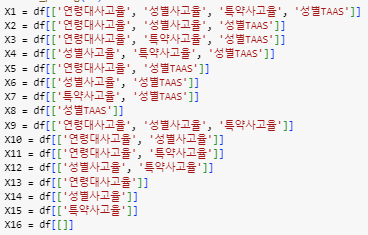

- c1 : 전년도사고율 (1~16)
  - 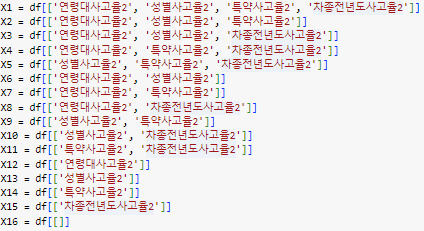

In [70]:
# 사용하고 싶은 라벨 설정

a1 = 1
a2 = 1
a3 = 1
a4 = 1
a5 = 1
a6 = 1
a7 = 1

b1 = 1
c1 = 1

In [71]:

for i in range(100):
  df_yn = train_df.sample(n=8000) # train set 은 걍 데이터 뽑으면 됩니다

  # train X, y 데이터셋 만들기
  train_X, train_y = combind_df(df_yn, a1,a2,a3,a4,a5,a6,a7, b1,c1)

  test_X, _ = combind_df(test_dfs[i], a1,a2,a3,a4,a5,a6,a7, b1,c1)